In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
data=pd.read_csv('C:/Users/mohin/Downloads/Used_fiat_500_in_Italy_dataset.csv')
print(data.head())

    model  engine_power transmission  age_in_days      km  previous_owners  \
0     pop            69       manual         4474   56779                2   
1  lounge            69       manual         2708  160000                1   
2  lounge            69    automatic         3470  170000                2   
3   sport            69       manual         3288  132000                2   
4   sport            69       manual         3712  124490                2   

         lat       lon  price  
0  45.071079   7.46403   4490  
1  45.069679   7.70492   4500  
2  45.514599   9.28434   4500  
3  41.903221  12.49565   4700  
4  45.532661   9.03892   4790  


In [6]:
print(data.isnull().sum())

model              0
engine_power       0
transmission       0
age_in_days        0
km                 0
previous_owners    0
lat                0
lon                0
price              0
dtype: int64


In [7]:
data=data.dropna()

In [8]:
data.fillna(0)

,model,engine_power,transmission,age_in_days,km,previous_owners,lat,lon,price
0,pop,69,manual,4474,56779,2,45.071079,7.46403,4490
1,lounge,69,manual,2708,160000,1,45.069679,7.70492,4500
2,lounge,69,automatic,3470,170000,2,45.514599,9.28434,4500
3,sport,69,manual,3288,132000,2,41.903221,12.49565,4700
4,sport,69,manual,3712,124490,2,45.532661,9.03892,4790
...,...,...,...,...,...,...,...,...,...
375,lounge,69,manual,4474,55976,2,45.610050,9.24234,5500
376,lounge,69,manual,4200,134717,1,44.102020,9.82024,5500
377,lounge,69,manual,3470,113344,1,41.003799,16.87294,5500
378,pop,69,automatic,3712,130000,1,45.810501,8.96474,5500


In [9]:
print(data.describe())

       engine_power  age_in_days             km  previous_owners         lat  \
count    380.000000   380.000000     380.000000       380.000000  380.000000   
mean      73.015789  3310.265789  102196.250000         1.510526   44.257712   
std        9.984672  1437.555063   47115.355234         0.560244    1.767518   
min       69.000000    91.000000    4981.000000         1.000000   37.510872   
25%       69.000000  3097.250000   76611.750000         1.000000   43.514196   
50%       69.000000  3927.000000  112000.000000         1.000000   45.069679   
75%       69.000000  4322.000000  135000.000000         2.000000   45.556942   
max      101.000000  4719.000000  259000.000000         4.000000   46.781651   

              lon         price  
count  380.000000    380.000000  
mean    10.742644   5881.655263  
std      2.167753   2170.617946  
min      7.320720   2890.000000  
25%      9.159140   4600.000000  
50%     10.301505   5000.000000  
75%     12.346788   5500.000000  
max    

In [10]:
print(data)

      model  engine_power transmission  age_in_days      km  previous_owners  \
0       pop            69       manual         4474   56779                2   
1    lounge            69       manual         2708  160000                1   
2    lounge            69    automatic         3470  170000                2   
3     sport            69       manual         3288  132000                2   
4     sport            69       manual         3712  124490                2   
..      ...           ...          ...          ...     ...              ...   
375  lounge            69       manual         4474   55976                2   
376  lounge            69       manual         4200  134717                1   
377  lounge            69       manual         3470  113344                1   
378     pop            69    automatic         3712  130000                1   
379  lounge            99       manual         4566   96000                1   

           lat       lon  price  
0    

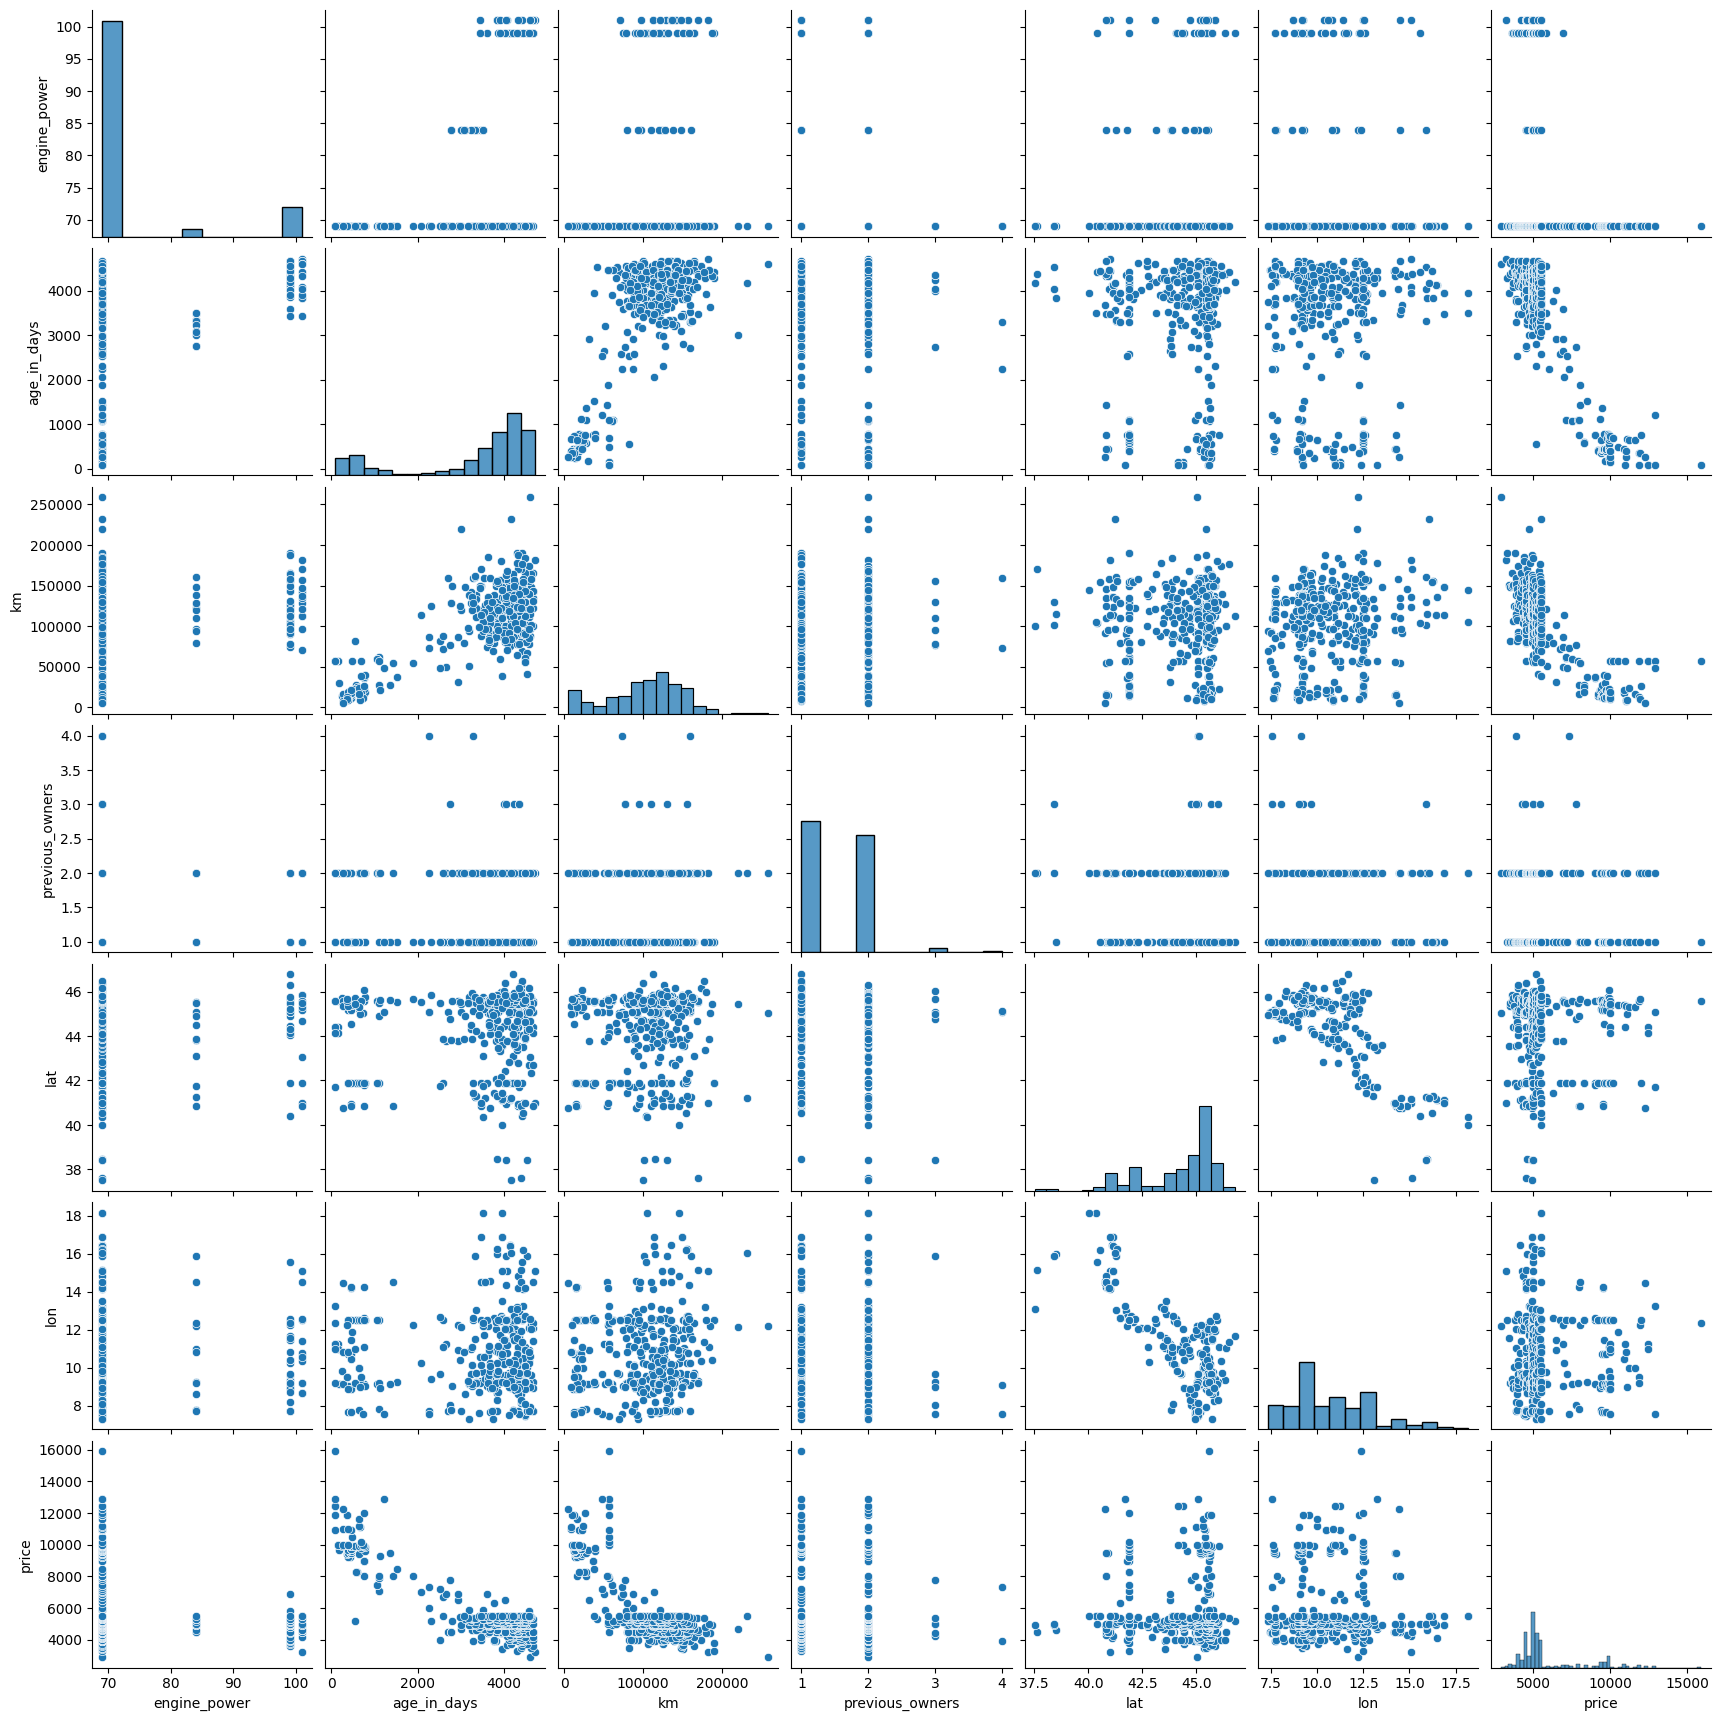

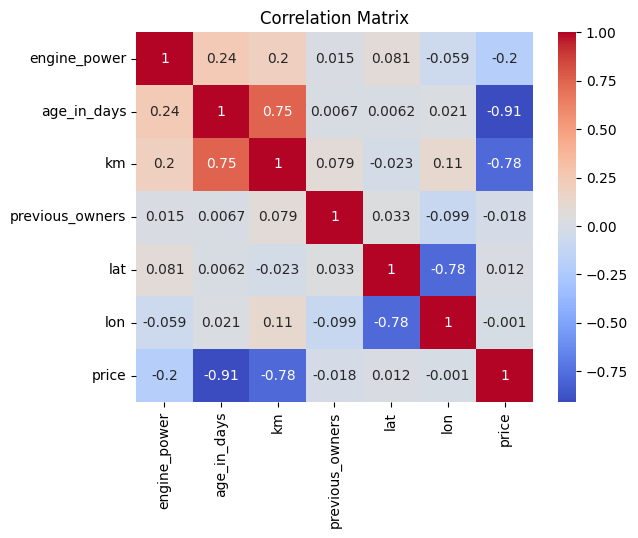

In [12]:
sns.pairplot(data)
plt.show()

# Select only the numerical columns for the correlation matrix
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = data[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


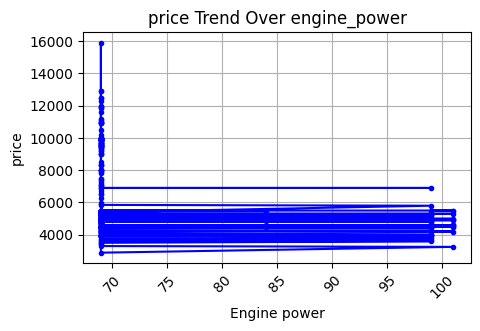

In [15]:
import matplotlib as mpl

plt.figure(figsize=(5, 3))
plt.plot(data['engine_power'], data['price'], color='blue', linestyle='-', marker='.')
plt.title('price Trend Over engine_power')
plt.xlabel('Engine power')
plt.ylabel('price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

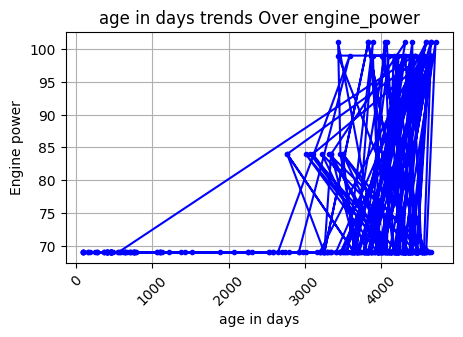

In [20]:
import matplotlib as mpl

plt.figure(figsize=(5, 3))
plt.plot(data['age_in_days'], data['engine_power'], color='blue', linestyle='-', marker='.')
plt.title('age in days trends Over engine_power')
plt.xlabel('age in days')
plt.ylabel('Engine power')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

C:\Users\mohin\AppData\Local\Temp\ipykernel_7748\717158696.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='engine_power', y='price', data=average_price_by_age, palette='coolwarm')


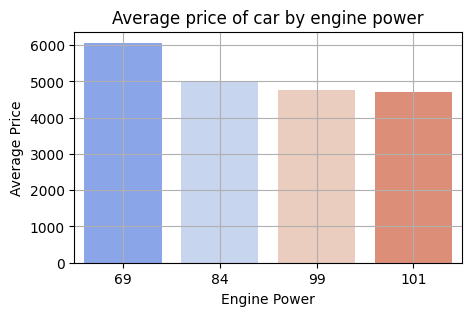

In [27]:

average_price_by_age = data.groupby('engine_power')['price'].mean().reset_index()

plt.figure(figsize=(5, 3))
sns.barplot(x='engine_power', y='price', data=average_price_by_age, palette='coolwarm')
plt.title('Average price of car by engine power')
plt.xlabel('Engine Power')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()